# Diabetes prediction

This app predicts if a person has diabetes or not based on some diagnostic measurements. The data used for training the model is obtained from the [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) on Kaggle.

# Import files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The Outcome variable is our target variable. It is a binary variable that indicates if the patient has tested positive for diabetes or not. 1 means the patient test is positive and 0 means the patient test is negative.     

# EDA

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 rows and 9 columns in the dataset, with no missing values.

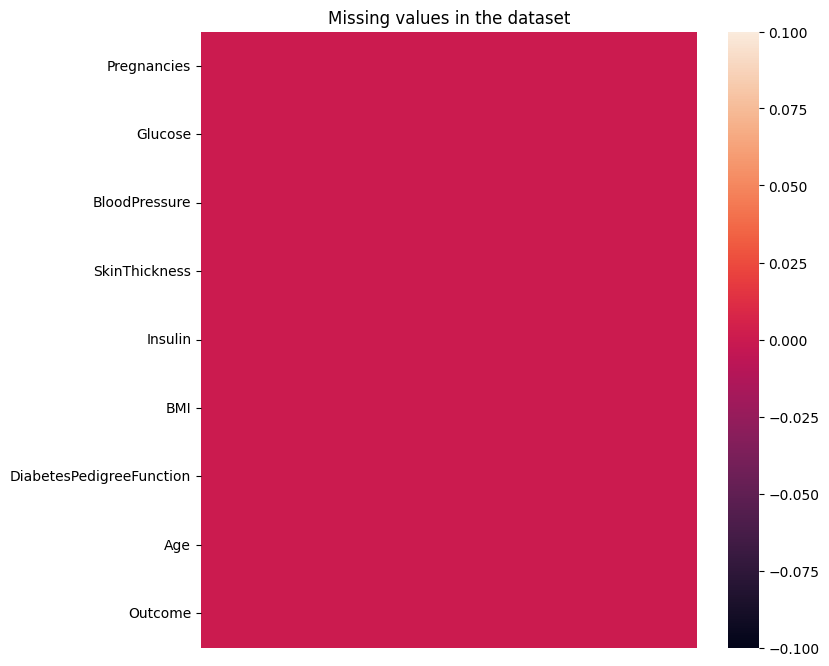

In [5]:
ax, fig = plt.subplots(figsize=(8, 8))    
img = sns.heatmap(diabetes_data.transpose().isnull())
img.set_title('Missing values in the dataset')
img.set_xticks([])
img.tick_params(axis='x', which='major', labelsize=6)   

In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The Pregnancies variable has a maximum value of 17, which is quite high, so we will check for outliers.

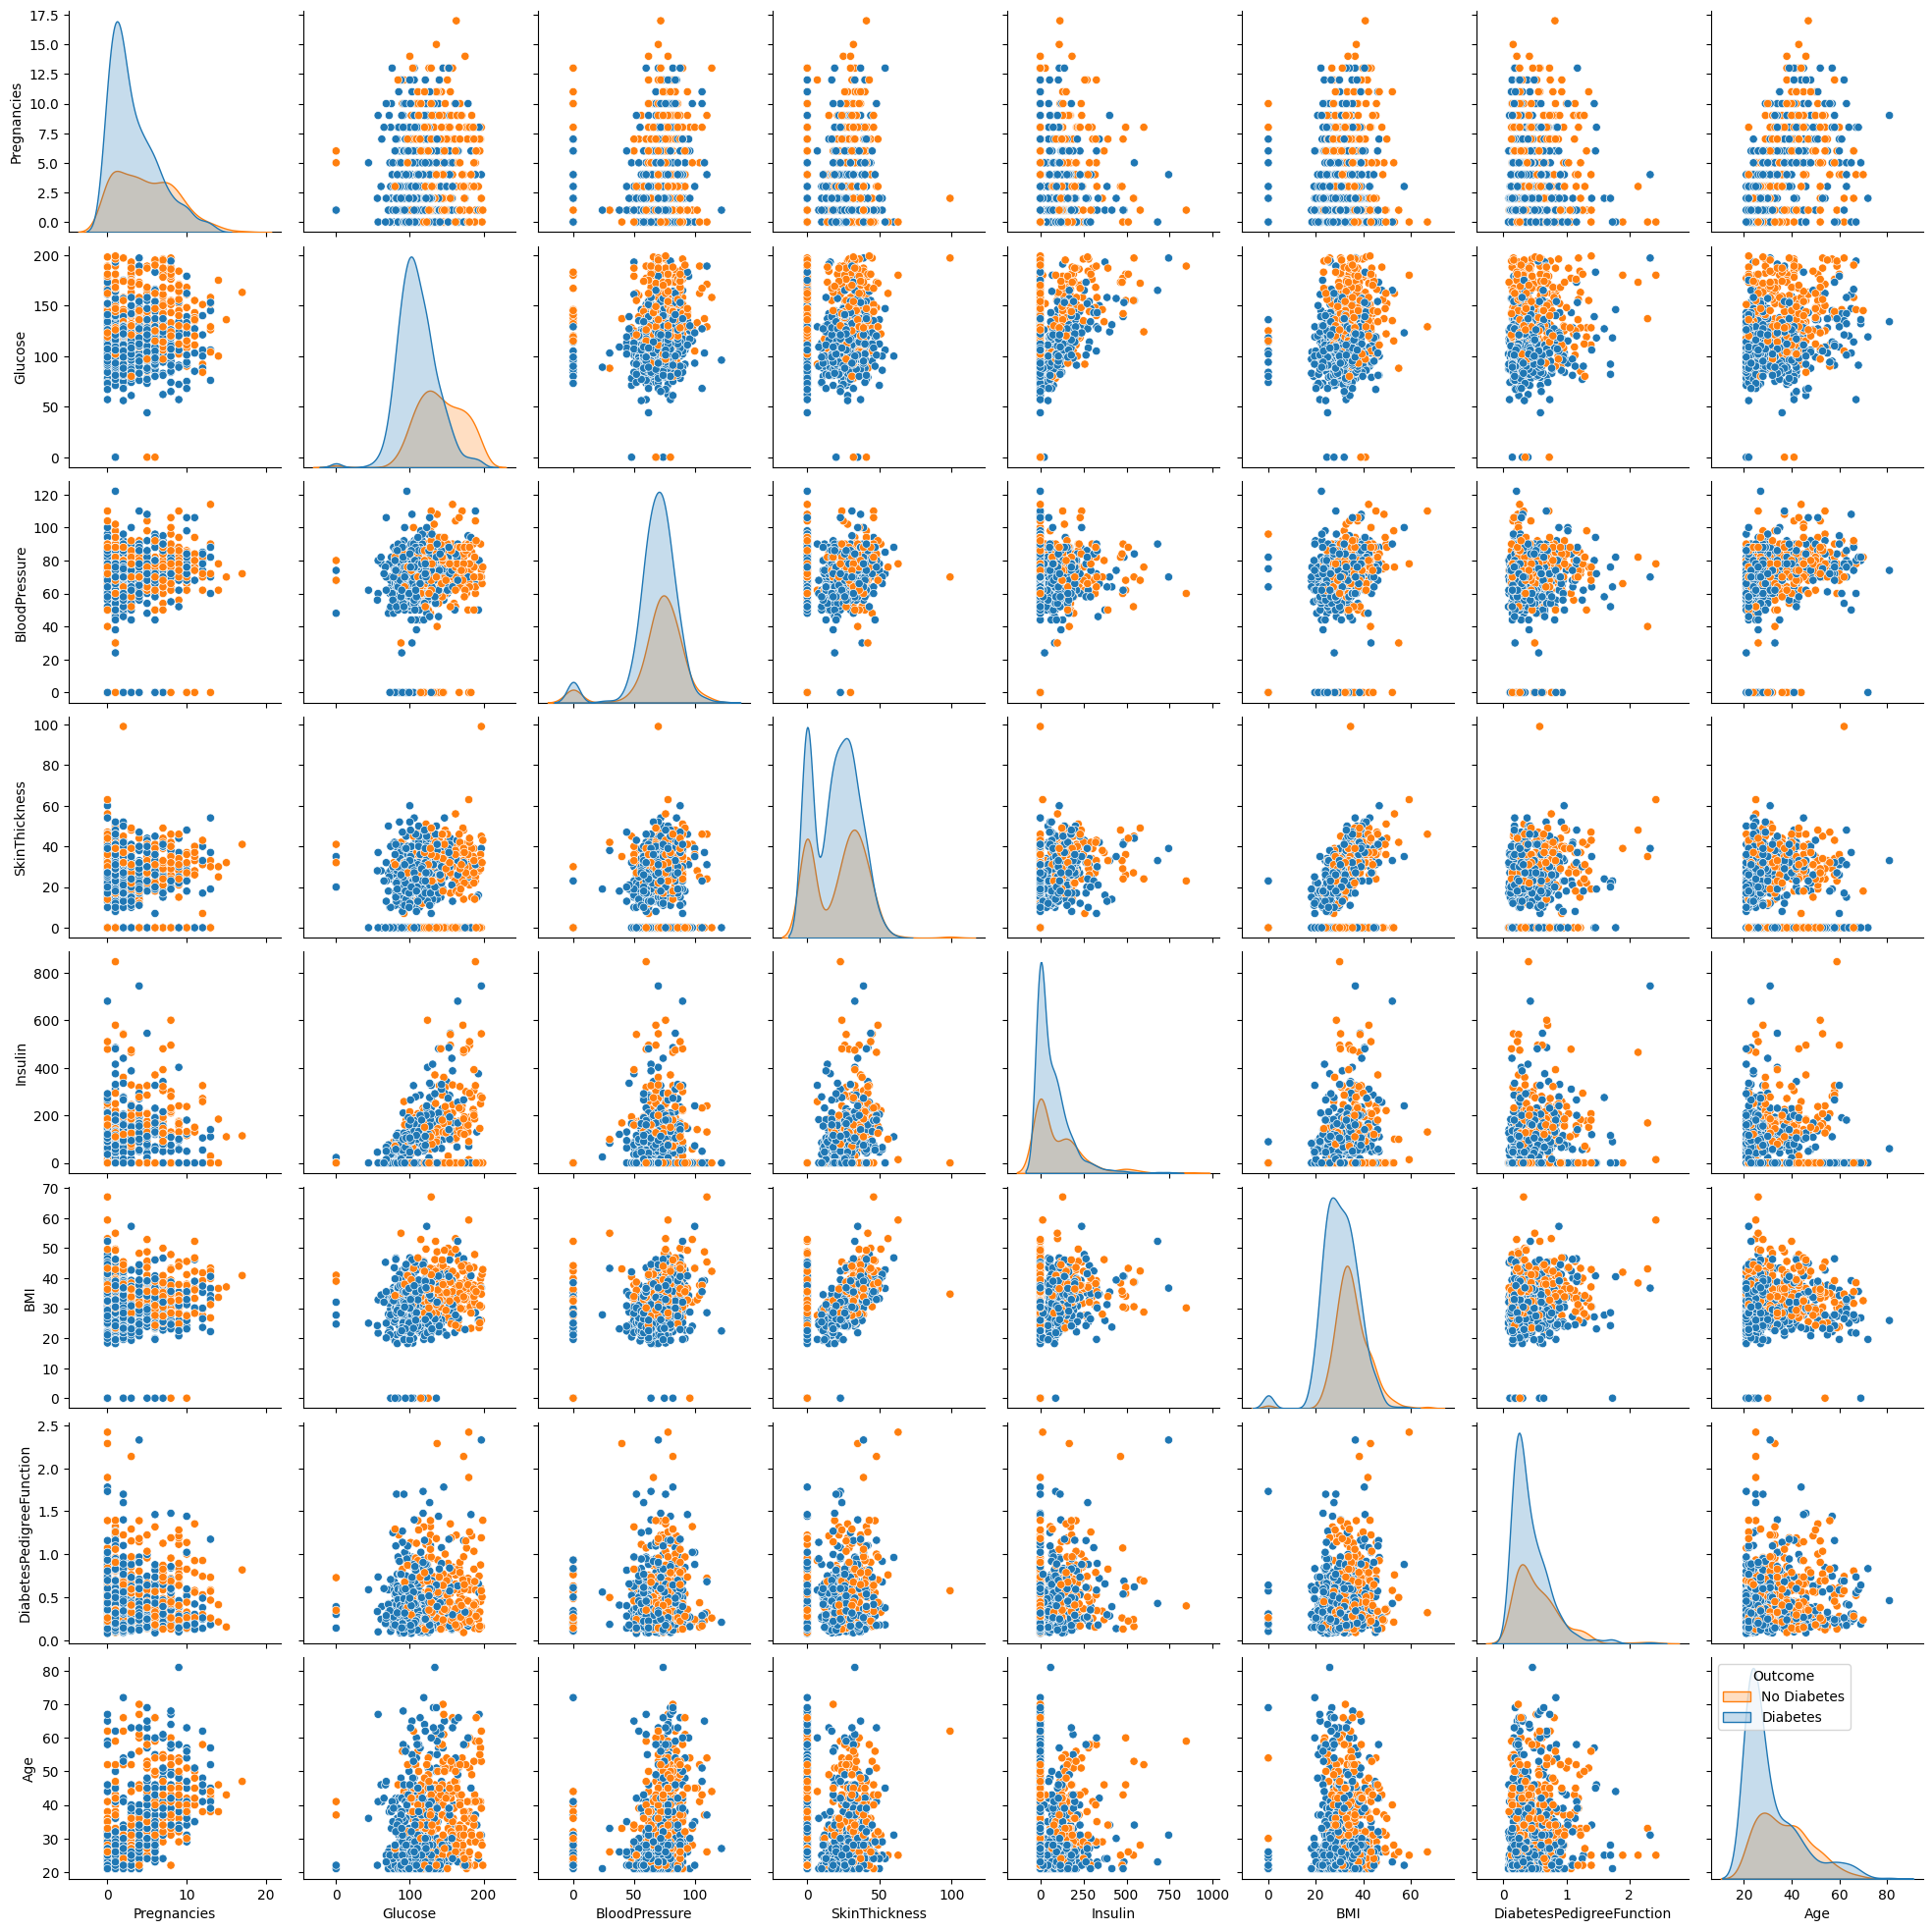

In [17]:
fig = sns.pairplot(diabetes_data, hue='Outcome')
fig._legend.remove()
#plt.legend([],[], frameon=False)
plt.legend(title='Outcome', loc=2, labels=['No Diabetes', 'Diabetes'], prop={'size': 10})       



All the variables present a big difference in distribution between the outcome classes, which is a good sign for the model. 